In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

In [44]:
# *************************************
# *** READ SOME DATA FROM A PROJECT ***
# *************************************
print('*************************************')
print('- Project name is ', b025_f001['project_name'])
print('- Major radius of the consedered tokamak is {:0.3f} m'.format(b025_f001['R0']))
print('- Project has Lx = {:0.3f}'.format(b025_f001['Lx']))
print('- Working radial domain is s = [{:0.3f}, {:0.3f}]'.format(b025_f001['sfmin'], b025_f001['sfmax']))
print('- All species in the project are ', b025_f001['species_names'])
print('- All kinetic species in the project are ', b025_f001['kin_species_names'])

print('\n*************************************')
print('- Project name is ', b025k_f001['project_name'])
print('- All species in the project are ', b025k_f001['species_names'])
print('- All kinetic species in the project are ', b025k_f001['kin_species_names'])

print('\n*************************************')
print('- Current data written in a project:', b025_f001.keys())

*************************************
- Project name is  LINEAR\ ES\, ADIABATIC\ ELECTRONS
- Major radius of the consedered tokamak is 1.620 m
- Project has Lx = 551.600
- Working radial domain is s = [0.000, 0.950]
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'fast']

*************************************
- Project name is  LINEAR\ EM\, DRIFT-KINETIC\ ELECTRONS
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'electrons', 'fast']

*************************************
- Current data written in a project: dict_keys(['a0', 'R0', 'B0', 'mass_pf', 'path', 'project_name', 'path_orb', 'max_size_Gb', 'oper_system', 'path_ext', 'n_starts', 'species_names', 'kin_species_names', 'kin_species', 'pf', 'deuterium', 'electrons', 'fast', '3d', 'Lx', 'beta', 'sfmin', 'sfmax', 'wc', 'cs', 'vt', 'Lwork', 'T_speak', 'rhoL_speak', 'q'])


<IPython.core.display.Javascript object>


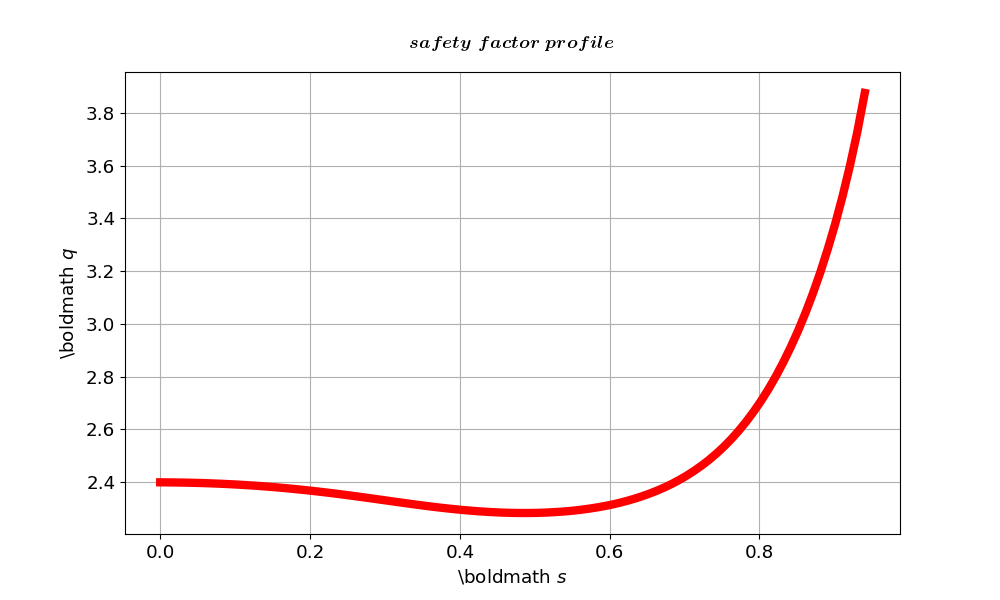

In [43]:
# **********************************
# *** PLOT SAFETY FACTOR PROFILE ***
# **********************************
reload()

ff = GLO.DEF_PLOT_FORMAT
ff['xlabel'] = 's'
ff['ylabel'] = 'q'
ff['title'] = 'safety\ factor\ profile'
ff['legends'] = ['q']
ff['colors'] = ['red']

chosen_signal = GLO.create_signal(GLO.def_safety_factor, b025_f001)
oo_equ = {
    'signals': chosen_signal,
    'ff': ff,
    'x_end': 0.95
}
common.plot_vars_1d(oo_equ)

<IPython.core.display.Javascript object>


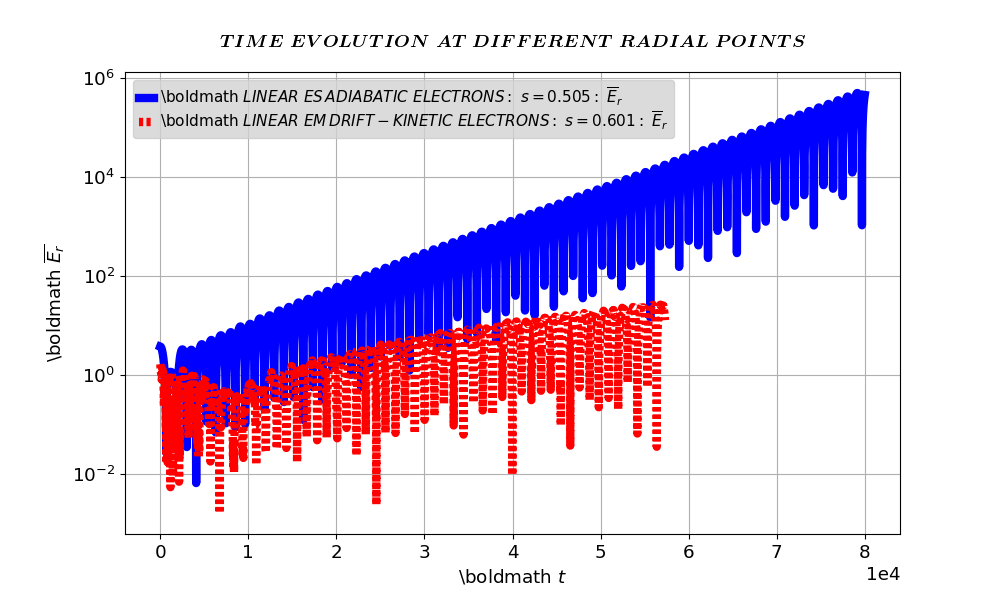

<IPython.core.display.Javascript object>


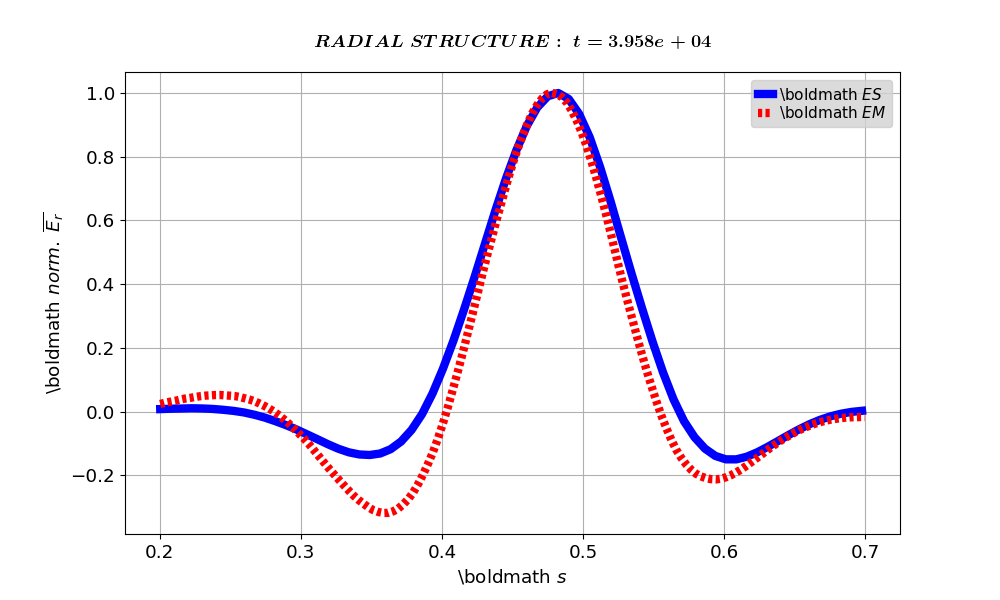

<IPython.core.display.Javascript object>


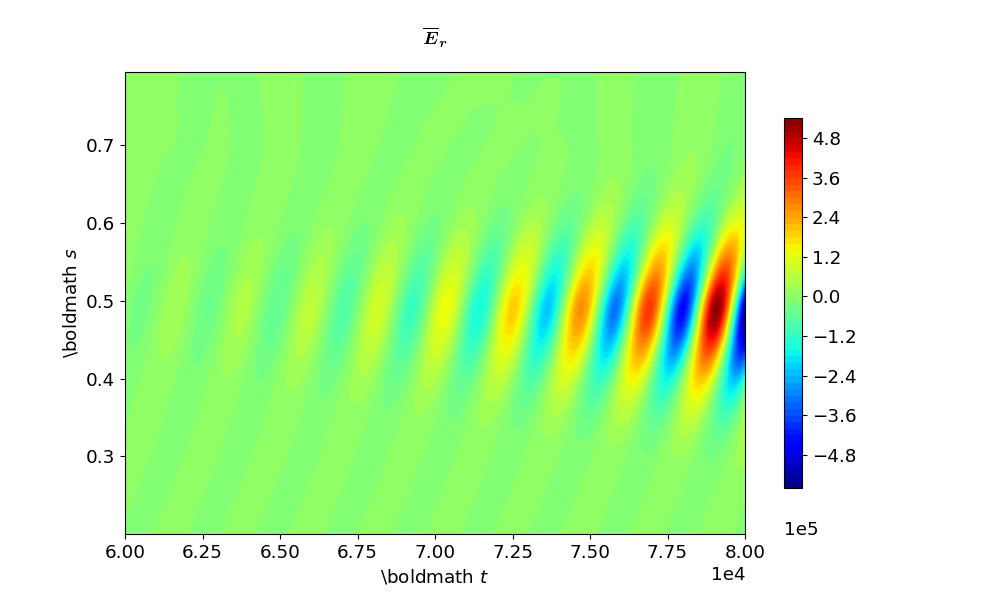

In [42]:
# ***************************************************************
# *** 1D and 2D PLOTS: ZONAL ELECTRIC FIELD ***
# ***************************************************************
reload()

# -------------------------------------------------------------------------
# --- TIME EVOLUTION at different s-points IN DIFFERENT PROJECTS ---
# define signal to plot
s_points = [0.5, 0.6]
erbar_signals = GLO.create_signals_dds(GLO.def_erbar_ts, 
                                       [b025_f001, b025k_f001],
                                      domains=s_points)

# define plot format
ff = GLO.DEF_PLOT_FORMAT
ff['flag_semilogy'] = True
ff['title'] = 'TIME\ EVOLUTION\ AT\ DIFFERENT\ RADIAL\ POINTS'
ff['xlabel'] = 't'
ff['ylabel'] = '\overline{E_r}'
ff['flag_diff_styles'] = True

# plotting
oo_t_plotting = {
    'signals': erbar_signals,
    'ff': ff,
}
common.plot_vars_1d(oo_t_plotting)

# -------------------------------------------------------------------------
# --- RADIAL STRUCTURE AT SOME TIME MOMENT IN DIFFERENT PROJECTS ---
# define signal to plot
time_moment = 3.9583e4
dds = [b025_f001, b025k_f001]
erbar_signals = GLO.create_signals_dds(GLO.def_erbar_ts,
    dds,
    operations=['point-t'] * len(dds),
    domains=[time_moment] * len(dds),
)

# define plot format
ff = GLO.DEF_PLOT_FORMAT
ff['flag_semilogy'] = False
ff['flag_norm'] = True
ff['title'] = 'RADIAL\ STRUCTURE:\ t = {:0.3e}'.format(time_moment)
ff['xlabel'] = 's'
ff['ylabel'] = 'norm.\ \overline{E_r}'
ff['flag_diff_styles'] = True
ff['legends'] = ['ES', 'EM']

# plotting
oo_t_plotting = {
    'signals': erbar_signals,
    'ff': ff,
    'x_start': 0.2, 'x_end': 0.7,
}
common.plot_vars_1d(oo_t_plotting)

# -------------------------------------------------------------------------
# --- TIME EVOLUTION OF THE RADIAL STRUCTURE ---
# define signal to plot
dds = [b025_f001, b025k_f001]
erbar_signal = GLO.create_signal(GLO.def_erbar_ts, b025_f001)

# define plot format
ff = GLO.DEF_PLOT_FORMAT
ff['titles'] = ['\overline{E}_r']
ff['xlabel'] = 't'
ff['ylabel'] = 's'

# plotting
oo_t_plotting = {
    'signals': erbar_signal,
    'ff': ff,
    's_start': 0.2, 's_end': 0.8,
    't_start': 6e4,
}
common.plot_vars_2d(oo_t_plotting)